In [ ]:
!pip install minisom

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from minisom import MiniSom
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

%matplotlib inline


In [ ]:
data_dir = ('/content/winequality-red.csv')

In [ ]:
raw_df = pd.read_csv(data_dir)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
raw_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Preprocessing

## Checking null values and removing it

In [ ]:
raw_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
raw_df.dropna(inplace=True)

In [ ]:
raw_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Checking for anomalies/outliers 

In [ ]:
feature_col = raw_df.columns.tolist()[1:-1]
target_col = raw_df.columns.tolist()[-1]

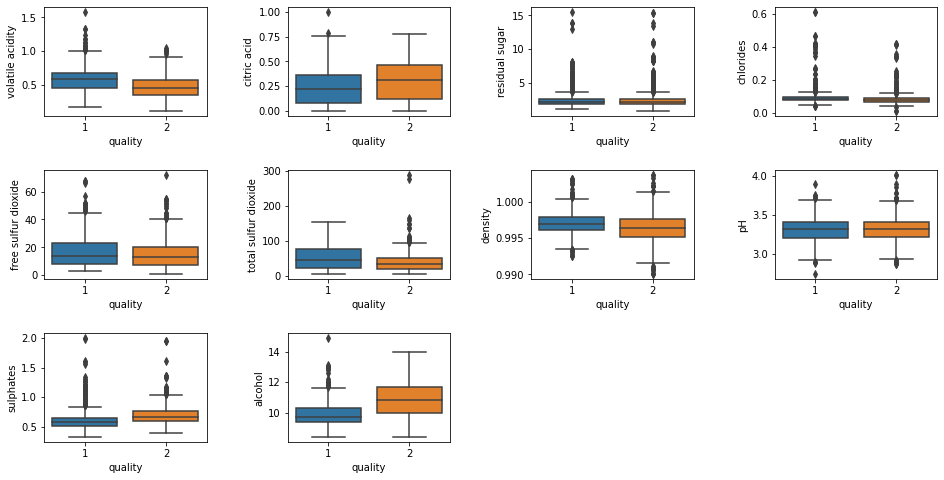

In [ ]:
fig = plt.figure(figsize=(16,8))
for i in range(len(feature_col)):
  subplot = fig.add_subplot(3,4,i+1)
  sns.boxplot(x=target_col,y=feature_col[i],data=raw_df)
  i = i+1
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.show()



```
fig = plt.figure(figsize=(16,8))
for i in range(len(feature_col)):
  subplot = fig.add_subplot(3,4,i+1)
  sns.boxplot(x=target_col,y=feature_col[i],data=raw_df)
  i = i+1
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.show()
```



In [ ]:
#include this code later on as it takes alot of time to run

##Marking features and label

In [ ]:
features = raw_df.iloc[:,:11]
label = raw_df['quality']

In [ ]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
label.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Analyzing Label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


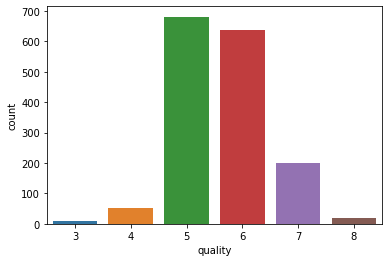

In [ ]:
sns.countplot(label)

Labels are not balanced therefore I will combine

0 ⇒ 3,4,5 ⇒ Bad

1 ⇒ 6,7,8 ⇒ Good

This will distribute our labels properly and we will get balanced label that will help us predict the quality of wine

In [ ]:
quality = []

for i in raw_df['quality']:
  if i >=1 and i <=5:
    quality.append('1')
  elif i >=6 and i<=8:
    quality.append('2')  
    
raw_df['quality'] = quality

### Label after making it balance


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


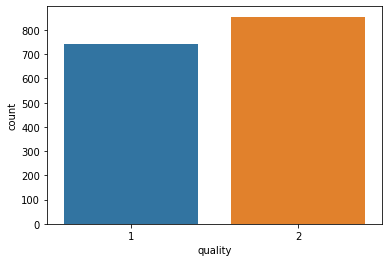

In [ ]:
label = raw_df['quality']
sns.countplot(label)

##Normalizing Numerical Columns 
### No text data to encode

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns= features.columns)

In [ ]:
scaled_features_df['quality'] = label

#Data Visualization 

[Text(0.5, 1.0, 'quality vs fixed acidity')]

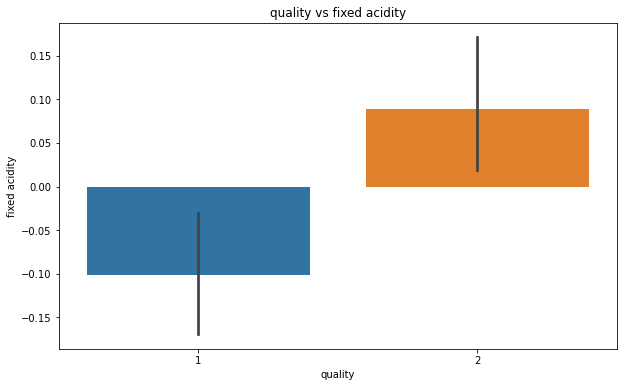

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='fixed acidity', data=scaled_features_df).set(title='quality vs fixed acidity')


[Text(0.5, 1.0, 'quality vs volatile acidity')]

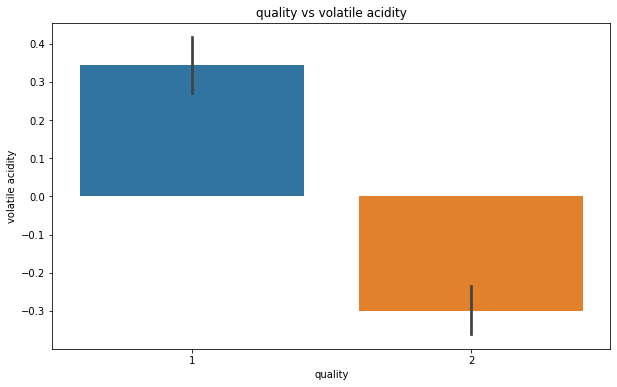

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='volatile acidity', data=scaled_features_df).set(title='quality vs volatile acidity')

[Text(0.5, 1.0, 'quality vs citric acid')]

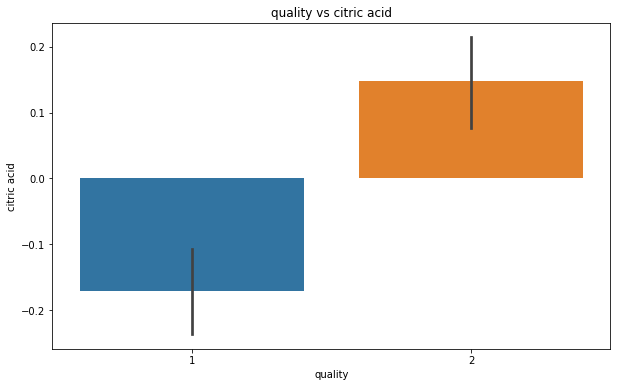

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='citric acid', data=scaled_features_df).set(title='quality vs citric acid')

[Text(0.5, 1.0, 'quality vs residual sugar')]

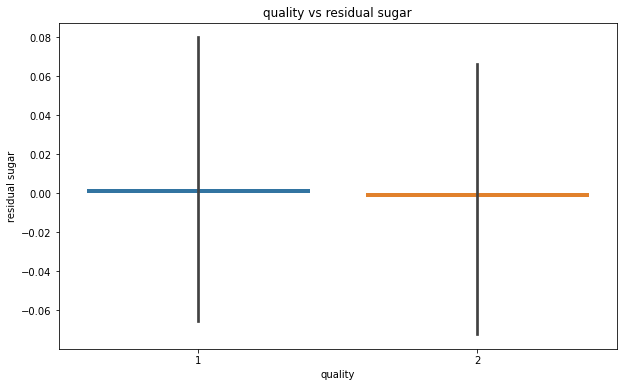

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='residual sugar', data=scaled_features_df).set(title='quality vs residual sugar')

[Text(0.5, 1.0, 'quality vs chlorides')]

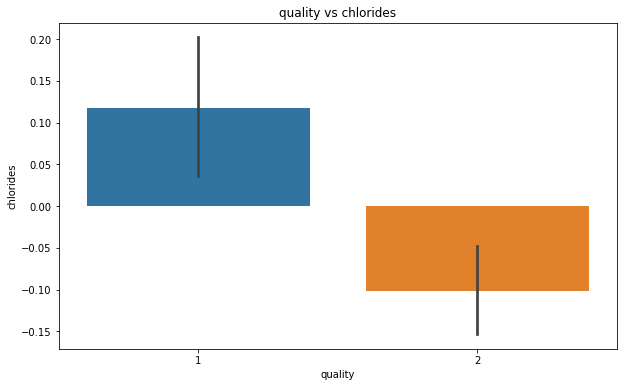

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='chlorides', data=scaled_features_df).set(title='quality vs chlorides')

[Text(0.5, 1.0, 'quality vs free sulfur dioxide')]

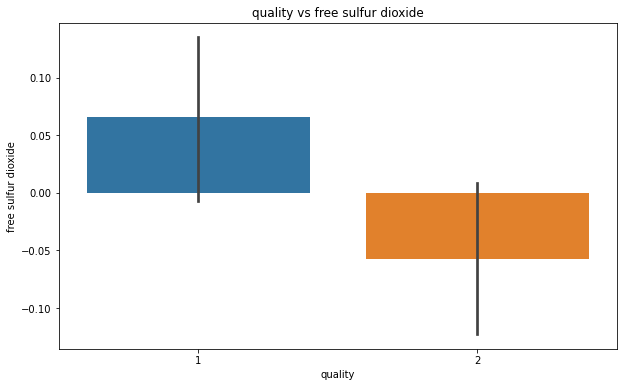

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=scaled_features_df).set(title='quality vs free sulfur dioxide')

[Text(0.5, 1.0, 'quality vs total sulfur dioxide ')]

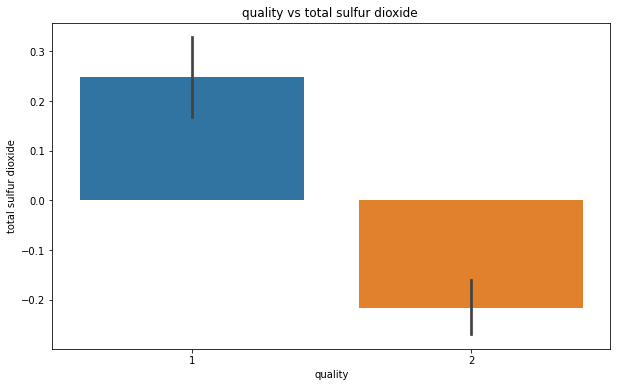

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=scaled_features_df).set(title='quality vs total sulfur dioxide ')

[Text(0.5, 1.0, 'quality vs density')]

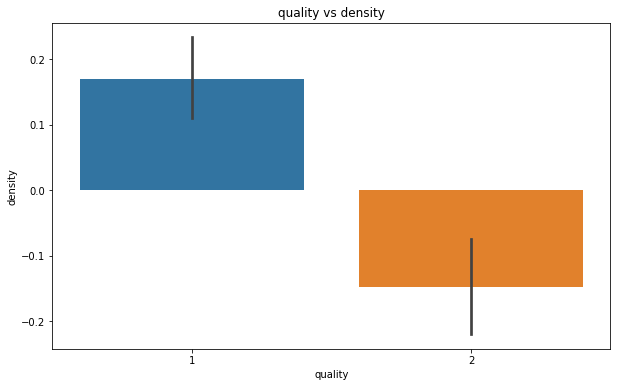

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='density', data=scaled_features_df).set(title='quality vs density')

[Text(0.5, 1.0, 'quality vs pH')]

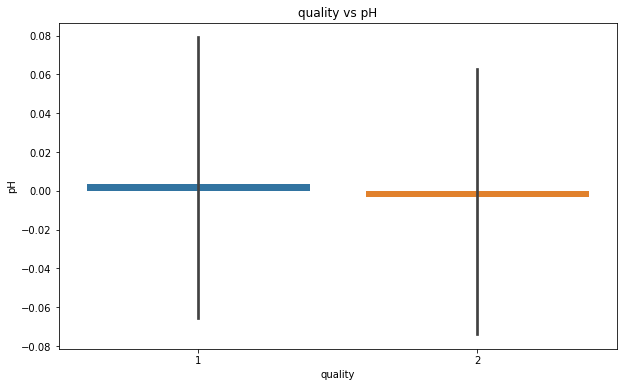

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='pH', data=scaled_features_df).set(title='quality vs pH')

[Text(0.5, 1.0, 'quality vs sulphates')]

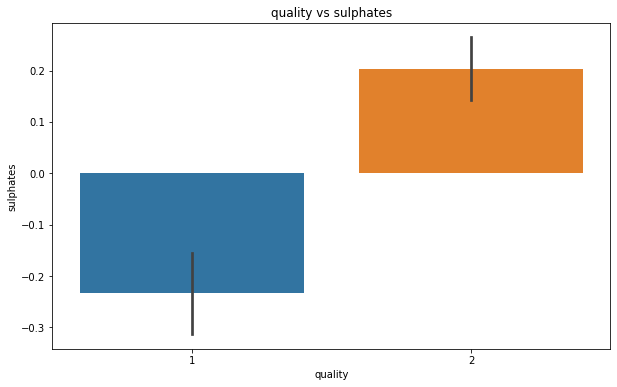

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='sulphates', data=scaled_features_df).set(title='quality vs sulphates')

[Text(0.5, 1.0, 'quality vs alcohol')]

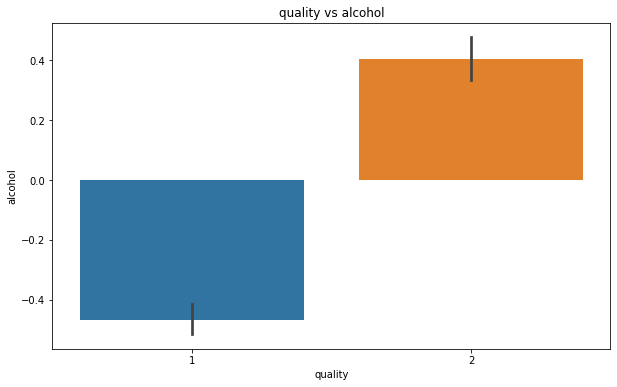

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='alcohol', data=scaled_features_df).set(title='quality vs alcohol')

In [ ]:
fig = plt.figure(figsize = (10,6))
px.scatter(scaled_features_df, 
           title='sulphates vs alcohol',
           x='sulphates', 
           y='alcohol', 
           color=label)

<Figure size 720x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (10,6))
px.scatter(scaled_features_df, 
           title='chlorides vs free sulfur dioxide',
           x='chlorides', 
           y='free sulfur dioxide', 
           color=label)

<Figure size 720x432 with 0 Axes>

## As we can see in bar plot pH and residual sugar doesn't provide any indication about quality of wine

# Problem Statement 

### Predicting quality of wine using 10 different features such as 'alcohol', 'pH', 'fixed acidity'etc and our label is 'quality' we will use a combination of  unsupersived and supervised methods to predict the quality of wine using this 10 features.

# Feature Selection 

In [ ]:
#sns.pairplot(raw_df)


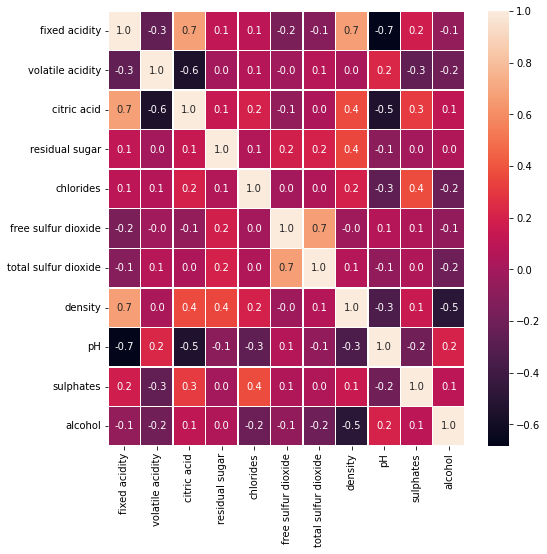

In [ ]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(scaled_features_df.corr(),annot=True, linewidths=0.5,fmt='.1f',ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



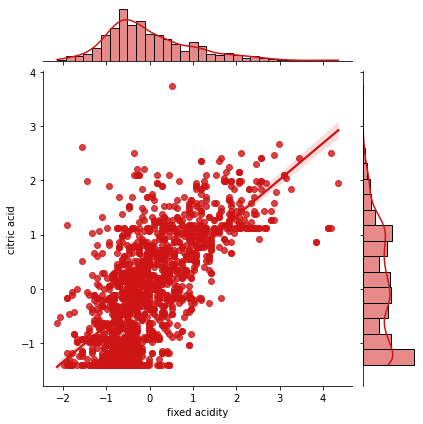

In [ ]:
sns.jointplot(scaled_features_df.loc[:,'fixed acidity'], scaled_features_df.loc[:,'citric acid'], kind = 'reg',color ='#ce1414')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



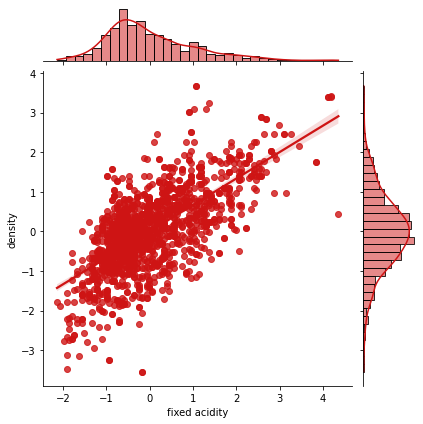

In [ ]:
sns.jointplot(scaled_features_df.loc[:,'fixed acidity'], scaled_features_df.loc[:,'density'], kind = 'reg',color ='#ce1414')


## I'll plot PCA graph to find principal components

In [ ]:
pca = PCA()
scaled_features_PCA = pca.fit_transform(scaled_features)

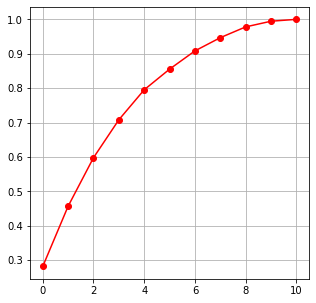

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

## As per the graph, 7 principle components gives us almost 95% of variance in the data. 
## I will take 7 components to predict the quality of data


In [ ]:
pca_new = PCA(n_components=7)
new_scaled_features_PCA = pca_new.fit_transform(scaled_features)

In [ ]:
new_scaled_features_PCA

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.06701448,
        -0.91392069, -0.16104319],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.01839156,
         0.92971392, -1.00982858],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.04353101,
         0.40147313, -0.53955348],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ...,  0.19371564,
        -0.50640956, -0.23108221],
       [-2.27051793,  0.97979111,  0.62796456, ...,  0.06773549,
        -0.86040762, -0.32148695],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.45048209,
        -0.49615364,  1.18913227]])

# Spliting data into training and testing sets with Principal components

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(new_scaled_features_PCA,label,test_size=0.25,random_state=10)


In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(Y_train_pca.shape)
print(Y_test_pca.shape)




(1199, 7)
(400, 7)
(1199,)
(400,)


# Comparing different models using Principal components and SOM

In [ ]:
som_model = MiniSom(10,10,7,sigma=0.3,learning_rate=0.15)
som_model.train(X_train_pca,50000,verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.1063862473689012


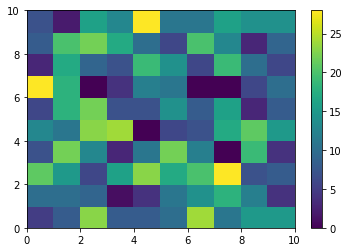

In [ ]:
activation = som_model.activation_response(X_train_pca)                                        
plt.pcolor(activation.T)
plt.colorbar()
plt.show()

In [ ]:
X_train_qnt = som_model.quantization(X_train_pca)

## Linear SVC

In [ ]:
svc_model_som = LinearSVC(max_iter=100000)
svc_model_som.fit(X_train_qnt,Y_train_pca)
svc_model_predict_som = svc_model_som.predict(som_model.quantization(X_test_pca))

In [ ]:
print('Linear SVC with SOM result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,svc_model_predict_som)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,svc_model_predict_som,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,svc_model_predict_som,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,svc_model_predict_som,average='weighted')*100, '%')

Linear SVC with SOM result:
 
Accuracy score  :  68.25 %
 
F1 score.       :  68.1590143284522 %
 
Precision score :  68.21306818181819 %
 
Recall score    :  68.25 %


In [ ]:
AS_LSVC_SOM = accuracy_score(Y_test_pca,svc_model_predict_som)*100
F1_LSVC_SOM = f1_score(Y_test_pca,svc_model_predict_som,average='weighted')*100
P_LSVC_SOM = precision_score(Y_test_pca,svc_model_predict_som,average='weighted')*100
R_LSVC_SOM = recall_score(Y_test_pca,svc_model_predict_som,average='weighted')*100

In [ ]:
F1_LSVC_SOM

68.1590143284522

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



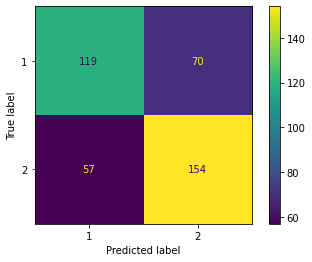

In [ ]:
plot_confusion_matrix(svc_model_som,som_model.quantization(X_test_pca),Y_test_pca)

##Logistic Regression 

In [ ]:
LGR_model_som = LogisticRegression(C=1,fit_intercept=True,solver='liblinear' ,max_iter=1000)
LGR_model_som.fit(X_train_qnt,Y_train_pca)
Y_test_predict_som= LGR_model_som.predict(som_model.quantization(X_test_pca))

In [ ]:
print('Logistic regression with SOM result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,Y_test_predict_som)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,Y_test_predict_som,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,Y_test_predict_som,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,Y_test_predict_som,average='weighted')*100, '%')

Logistic regression with SOM result:
 
Accuracy score  :  67.5 %
 
F1 score.       :  67.10551815585475 %
 
Precision score :  67.71263989466755 %
 
Recall score    :  67.5 %


In [ ]:
AS_LR_SOM = accuracy_score(Y_test_pca,Y_test_predict_som)*100
F1_LR_SOM = f1_score(Y_test_pca,Y_test_predict_som,average='weighted')*100
P_LR_SOM = precision_score(Y_test_pca,Y_test_predict_som,average='weighted')*100
R_LR_SOM = recall_score(Y_test_pca,Y_test_predict_som,average='weighted')*100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



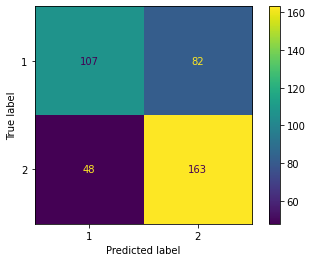

In [ ]:
plot_confusion_matrix(LGR_model_som,som_model.quantization(X_test_pca),Y_test_pca)

## Decision Tree Classifier

In [ ]:
dtc_som = DecisionTreeClassifier()
dtc_som.fit(X_train_qnt,Y_train_pca)
dtc_predict_som = dtc_som.predict(som_model.quantization(X_test_pca))

In [ ]:
print('Logistic regression with SOM result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,dtc_predict_som)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,dtc_predict_som,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,dtc_predict_som,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,dtc_predict_som,average='weighted')*100, '%')

Logistic regression with SOM result:
 
Accuracy score  :  68.75 %
 
F1 score.       :  68.64066607409649 %
 
Precision score :  68.72615959719255 %
 
Recall score    :  68.75 %


In [ ]:
AS_DTC_SOM = accuracy_score(Y_test_pca,dtc_predict_som)*100
F1_DTC_SOM = f1_score(Y_test_pca,dtc_predict_som,average='weighted')*100
P_DTC_SOM = precision_score(Y_test_pca,dtc_predict_som,average='weighted')*100
R_DTC_SOM = recall_score(Y_test_pca,dtc_predict_som,average='weighted')*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



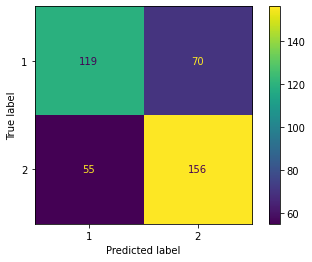

In [ ]:
plot_confusion_matrix(dtc_som,som_model.quantization(X_test_pca),Y_test_pca)

# Random Forest Classifier 

In [ ]:
rfc_som = RandomForestClassifier()
rfc_som.fit(X_train_qnt,Y_train_pca)
rfc_predict_som = rfc_som.predict(som_model.quantization(X_test_pca))

In [ ]:
print('Logistic regression with SOM result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,rfc_predict_som)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,rfc_predict_som,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,rfc_predict_som,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,rfc_predict_som,average='weighted')*100, '%')

Logistic regression with SOM result:
 
Accuracy score  :  69.0 %
 
F1 score.       :  68.69255416539518 %
 
Precision score :  69.17928442809051 %
 
Recall score    :  69.0 %


In [ ]:
AS_RFC_SOM = accuracy_score(Y_test_pca,rfc_predict_som)*100
F1_RFC_SOM = f1_score(Y_test_pca,rfc_predict_som,average='weighted')*100
P_RFC_SOM = precision_score(Y_test_pca,rfc_predict_som,average='weighted')*100
R_RFC_SOM = recall_score(Y_test_pca,rfc_predict_som,average='weighted')*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



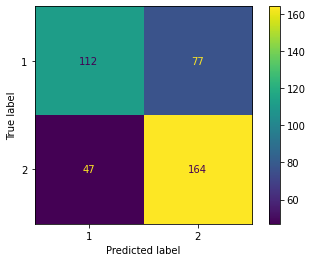

In [ ]:
plot_confusion_matrix(rfc_som,som_model.quantization(X_test_pca),Y_test_pca)

# Data Modelling using principal components only

#Linear SVC

In [ ]:
svc_model_pc = LinearSVC(max_iter=100000)
svc_model_pc.fit(X_train_pca,Y_train_pca)
svc_model_predict_pc = svc_model_pc.predict(X_test_pca)

In [ ]:
print('Linear SVC with SOM result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,svc_model_predict_pc)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,svc_model_predict_pc,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,svc_model_predict_pc,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,svc_model_predict_pc,average='weighted')*100, '%')

Linear SVC with SOM result:
 
Accuracy score  :  71.5 %
 
F1 score.       :  71.42679610183575 %
 
Precision score :  71.48312685262599 %
 
Recall score    :  71.5 %


In [ ]:

AS_LSVC = accuracy_score(Y_test_pca,svc_model_predict_pc)*100
F1_LSVC = f1_score(Y_test_pca,svc_model_predict_pc,average='weighted')*100
P_LSVC = precision_score(Y_test_pca,svc_model_predict_pc,average='weighted')*100
R_LSVC = recall_score(Y_test_pca,svc_model_predict_pc,average='weighted')*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



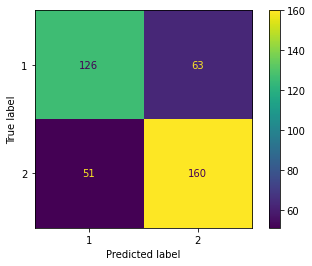

In [ ]:
plot_confusion_matrix(svc_model_pc,X_test_pca,Y_test_pca)

#Logistic regression 

In [ ]:
LGR_model_pc = LogisticRegression(C=1,fit_intercept=True,solver='liblinear' ,max_iter=1000)
LGR_model_pc.fit(X_train_pca,Y_train_pca)
Y_test_predict_pca= LGR_model_pc.predict(X_test_pca)

In [ ]:
print('Logistic Regression with PCA result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,Y_test_predict_pca)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,Y_test_predict_pca,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,Y_test_predict_pca,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,Y_test_predict_pca,average='weighted')*100, '%')

Logistic Regression with PCA result:
 
Accuracy score  :  71.25 %
 
F1 score.       :  71.10853719389334 %
 
Precision score :  71.29251918158567 %
 
Recall score    :  71.25 %


In [ ]:
AS_LR = accuracy_score(Y_test_pca,Y_test_predict_pca)*100
F1_LR = f1_score(Y_test_pca,Y_test_predict_pca,average='weighted')*100
P_LR = precision_score(Y_test_pca,Y_test_predict_pca,average='weighted')*100
R_LR = recall_score(Y_test_pca,Y_test_predict_pca,average='weighted')*100


In [ ]:
R_LR

71.25

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



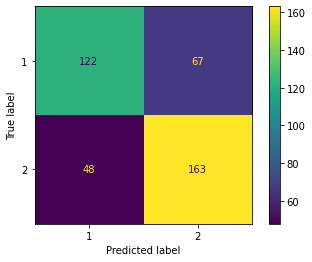

In [ ]:
plot_confusion_matrix(LGR_model_pc,X_test_pca,Y_test_pca)

# Decision Tree Classifier


In [ ]:
dtc_pc = DecisionTreeClassifier()
dtc_pc.fit(X_train_pca,Y_train_pca)
dtc_predict_pc = dtc_pc.predict(X_test_pca)

In [ ]:
print('Decision Tree Classifier with PCA result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,dtc_predict_pc)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,dtc_predict_pc,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,dtc_predict_pc,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,dtc_predict_pc,average='weighted')*100, '%')

Decision Tree Classifier with PCA result:
 
Accuracy score  :  71.75 %
 
F1 score.       :  71.76856516977 %
 
Precision score :  71.8310574229692 %
 
Recall score    :  71.75 %


In [ ]:
AS_DTC = accuracy_score(Y_test_pca,dtc_predict_pc)*100
F1_DTC = f1_score(Y_test_pca,dtc_predict_pc,average='weighted')*100
P_DTC = precision_score(Y_test_pca,dtc_predict_pc,average='weighted')*100
R_DTC = recall_score(Y_test_pca,dtc_predict_pc,average='weighted')*100

In [ ]:
AS_DTC

71.75

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



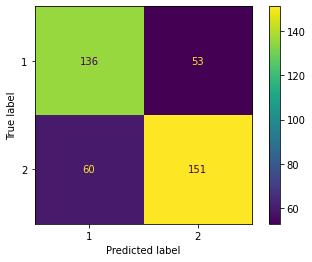

In [ ]:
plot_confusion_matrix(dtc_pc,X_test_pca,Y_test_pca)

# Random Forest Classifer 

In [ ]:
rfc_pa = RandomForestClassifier()
rfc_pa.fit(X_train_pca,Y_train_pca) 
rfc_predict_pa = rfc_pa.predict(X_test_pca)

In [ ]:
print('Random Forest Classifier with PCA result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_pca,rfc_predict_pa)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_pca,rfc_predict_pa,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_pca,rfc_predict_pa,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_pca,rfc_predict_pa,average='weighted')*100, '%')

Random Forest Classifier with PCA result:
 
Accuracy score  :  80.0 %
 
F1 score.       :  79.9788965933072 %
 
Precision score :  79.99395633451688 %
 
Recall score    :  80.0 %


In [ ]:
AS_RFC = accuracy_score(Y_test_pca,rfc_predict_pa)*100
F1_RFC = f1_score(Y_test_pca,rfc_predict_pa,average='weighted')*100
P_RFC  = precision_score(Y_test_pca,rfc_predict_pa,average='weighted')*100
R_RFC = recall_score(Y_test_pca,rfc_predict_pa,average='weighted')*100




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



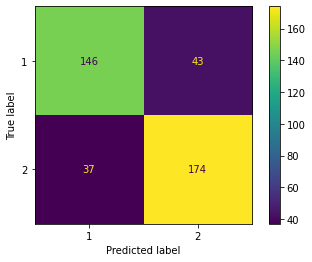

In [ ]:
plot_confusion_matrix(rfc_pa,X_test_pca,Y_test_pca)

# Comparison of accuracy score, F1 score, Precision score and Recall Score 

In [ ]:
from tabulate import tabulate
from prettytable import PrettyTable

In [ ]:
table_with_SOM = PrettyTable(['Models with SOM','Accuracy Score', 'F1 Score', 'Precision Score','Recall Score'])


table_with_SOM.add_row(['Linear SVM',AS_LSVC_SOM,F1_LSVC_SOM,P_LSVC_SOM,R_LSVC_SOM])
table_with_SOM.add_row(['','','','',''])
table_with_SOM.add_row(['Logistic Regression',AS_LR_SOM,F1_LR_SOM,P_LR_SOM,R_LR_SOM])  
table_with_SOM.add_row(['','','','',''])      
table_with_SOM.add_row(['Decision Tree Classifier',AS_DTC_SOM,F1_DTC_SOM,P_DTC_SOM,R_DTC_SOM])
table_with_SOM.add_row(['','','','',''])
table_with_SOM.add_row(['Random Forest Classifier',AS_RFC_SOM,F1_RFC_SOM,P_RFC_SOM,R_RFC_SOM])

In [ ]:

print(table_with_SOM)

+--------------------------+----------------+-------------------+-------------------+--------------+
|     Models with SOM      | Accuracy Score |      F1 Score     |  Precision Score  | Recall Score |
+--------------------------+----------------+-------------------+-------------------+--------------+
|        Linear SVM        |     68.25      |  68.1590143284522 | 68.21306818181819 |    68.25     |
|                          |                |                   |                   |              |
|   Logistic Regression    |      67.5      | 67.10551815585475 | 67.71263989466755 |     67.5     |
|                          |                |                   |                   |              |
| Decision Tree Classifier |     68.75      | 68.64066607409649 | 68.72615959719255 |    68.75     |
|                          |                |                   |                   |              |
| Random Forest Classifier |      69.0      | 68.69255416539518 | 69.17928442809051 |     6

In [ ]:
table_PCA = PrettyTable(['Models with 7 PC','Accuracy Score', 'F1 Score', 'Precision Score','Recall Score'])


table_PCA.add_row(['Linear SVM',AS_LSVC,F1_LSVC,P_LSVC,R_LSVC])
table_PCA.add_row(['','','','',''])
table_PCA.add_row(['Logistic Regression',AS_LR,F1_LR,P_LR,R_LR])  
table_PCA.add_row(['','','','',''])      
table_PCA.add_row(['Decision Tree Classifier',AS_DTC,F1_DTC,P_DTC,R_DTC])
table_PCA.add_row(['','','','',''])
table_PCA.add_row(['Random Forest Classifier',AS_RFC,F1_RFC,P_RFC,R_RFC])

          
          
          
          

In [ ]:
print(table_PCA)

+--------------------------+----------------+-------------------+-------------------+--------------+
|     Models with 7 PC     | Accuracy Score |      F1 Score     |  Precision Score  | Recall Score |
+--------------------------+----------------+-------------------+-------------------+--------------+
|        Linear SVM        |      71.5      | 71.42679610183575 | 71.48312685262599 |     71.5     |
|                          |                |                   |                   |              |
|   Logistic Regression    |     71.25      | 71.10853719389334 | 71.29251918158567 |    71.25     |
|                          |                |                   |                   |              |
| Decision Tree Classifier |     71.75      |   71.76856516977  |  71.8310574229692 |    71.75     |
|                          |                |                   |                   |              |
| Random Forest Classifier |      80.0      |  79.9788965933072 | 79.99395633451688 |     8

# Usually models combined with PCA and SOM yeilds the best result but it isnt the case here because data here is not very seperated and even if we use best models our accuracy will be in lower 90s. Data seems to be balanced but it isnt as most of our labels are from 5 and 6 quality, after which we seperated it to different label into good and bad.
# We will get very high accuracy if split label in 3 parts which is 
##3 and 4 = bad
##5 and 6 = average 
##7 and 8 = good
# If we split labels like this we can achieve 98-97% accuracy score. 

# Best accuracy score we got is from Random Forest Classifier with 8 PC to improve this model we will try it with 6 and 8 PC to check where we get back scores

# Random Forest Classifier with 6 PC






In [ ]:
pca_6 = PCA(n_components=6)
scaled_features_6 = pca_6.fit_transform(scaled_features)

In [ ]:
X_train_6, X_test_6, Y_train_6, Y_test_6 = train_test_split(scaled_features_6,label,test_size=0.25,random_state=10)


In [ ]:
rfc_6 = RandomForestClassifier()
rfc_6.fit(X_train_6,Y_train_6) 
rfc_predict_6 = rfc_6.predict(X_test_6)

In [ ]:
print('Random Forest Classifier with PCA result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_6,rfc_predict_6)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_6,rfc_predict_6,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_6,rfc_predict_6,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_6,rfc_predict_6,average='weighted')*100, '%')

Random Forest Classifier with PCA result:
 
Accuracy score  :  79.5 %
 
F1 score.       :  79.44734456447836 %
 
Precision score :  79.53906665653264 %
 
Recall score    :  79.5 %


# Random Forest Classifier with 8 PC






In [ ]:
pca_8 = PCA(n_components=8)
scaled_features_8 = pca_8.fit_transform(scaled_features)

In [ ]:
X_train_8, X_test_8, Y_train_8, Y_test_8 = train_test_split(scaled_features_8,label,test_size=0.25,random_state=10)


In [ ]:
rfc_8 = RandomForestClassifier()
rfc_8.fit(X_train_8,Y_train_8) 
rfc_predict_8 = rfc_8.predict(X_test_8)

In [ ]:
print('Random Forest Classifier with 8 PC is my final result:')
print(" ")
print('Accuracy score  : ',accuracy_score(Y_test_8,rfc_predict_8)*100 ,'%')
print(" ")
print('F1 score.       : ', f1_score(Y_test_8,rfc_predict_8,average='weighted')*100, '%')
print(" ")
print('Precision score : ', precision_score(Y_test_8,rfc_predict_8,average='weighted')*100, '%')
print(" ")
print('Recall score    : ', recall_score(Y_test_8,rfc_predict_8,average='weighted')*100, '%')

Random Forest Classifier with 8 PC is my final result:
 
Accuracy score  :  81.75 %
 
F1 score.       :  81.72672296257201 %
 
Precision score :  81.7537932251235 %
 
Recall score    :  81.75 %
